In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [42]:
exp_1 = pd.read_excel("EXP-00001-Master.xlsx")

In [43]:
exp_2 = pd.read_excel('EXP-00002-Master.xlsx')

In [44]:
exp_3 = pd.read_excel('EXP-00003-Master.xlsx')

In [45]:
exp_4 = pd.read_excel('EXP-00004-Master.xlsx')
exp_5 = pd.read_excel('EXP-00004-Master.xlsx')

In [46]:
import chardet

file = 'ARCH00138-TM-Residential.csv'

with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [47]:
ss = pd.read_csv(file, encoding= 'ISO-8859-1')
ss

C:\Users\resoj\AppData\Local\Temp\ipykernel_14688\1272363653.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,37,38,39,40,41,42,43,44,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  ss = pd.read_csv(file, encoding= 'ISO-8859-1')


,Id,Img Id,Da,Dp,FWidth,FLength,FThickness,ELength,EThickness,EWidth,...,L/W Ratio,W/L Ratio,W/T Ratio,T/W Ratio,CHull Surface Area,Sieve,Angularity,Ellipticity,Fiber Length,Fiber Width
0,,,mm,mm,mm,mm,mm,mm,mm,mm,...,,,,,mm²,mm,,,mm,mm
1,43167,30416,7.651,9.678,7.343,9.459,7.107,8.887,7.327,7.489,...,1.288,0.776,1.033,0.968,201.719,7.225,28.667,1.213,12.37,3.93
2,17818,16917,8.333,14.854,8.484,13.222,6.844,12.323,5.986,7.576,...,1.559,0.642,1.24,0.807,262.4,7.664,35,2.059,25.247,2.166
3,41279,28693,7.432,9.354,6.965,9.83,6.752,9.167,6.4,6.88,...,1.411,0.709,1.031,0.969,192.099,6.859,28.359,1.432,13.105,3.264
4,37511,26135,6.6,7.496,6.648,7.819,6.102,7.185,6.135,6.708,...,1.176,0.85,1.089,0.918,144.156,6.375,26.51,1.171,8.014,4.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44225,5720,12766,0.142,0.152,0.125,0.179,0.125,0.17,0.121,0.121,...,1.435,0.697,1.0,1.0,0.064,0.125,58.571,1.408,0.0,0.0
44226,42084,29325,0.138,0.164,0.125,0.181,0.125,0.163,0.122,0.122,...,1.444,0.692,1.0,1.0,0.067,0.125,72.857,1.336,0.157,0.096
44227,13662,15493,0.133,0.145,0.125,0.171,0.125,0.16,0.113,0.113,...,1.371,0.73,1.0,1.0,0.058,0.125,66.0,1.407,0.0,0.0
44228,44206,31435,0.126,0.154,0.125,0.177,0.125,0.153,0.113,0.113,...,1.414,0.707,1.0,1.0,0.058,0.125,66.25,1.353,0.165,0.075


In [48]:

exp_1.drop(index=0, inplace=True)
exp_2.drop(index=0, inplace=True)
exp_3.drop(index=0, inplace=True)
exp_4.drop(index = 0, inplace = True)
exp_5.drop(index = 0, inplace= True)
ss.drop(index = 0, inplace= True)

exp_1.reset_index(drop=True, inplace=True)
exp_2.reset_index(drop=True, inplace=True)
exp_3.reset_index(drop=True, inplace=True)
exp_4.reset_index(drop=True, inplace=True)
exp_5.reset_index(drop=True, inplace=True)
ss.reset_index(drop = True, inplace = True)

['Id', 'Img Id', 'Da', 'Dp', 'FWidth', 'FLength', 'FThickness',
       'ELength', 'EThickness', 'EWidth', 'Volume', 'Area', 'Perimeter',
       'CHull  Area', 'CHull Perimeter', 'Sphericity', 'L/T Ratio',
       'T/L Aspect Ratio', 'Compactness', 'Roundness', 'Ellipse Ratio',
       'Circularity', 'Solidity', 'Concavity', 'Convexity', 'Extent', 'hash',
       'Surface Area', 'Filter0', 'Filter1', 'Filter2', 'Filter3', 'Filter4',
       'Filter5', 'Filter6', 'L/W Ratio', 'W/L Ratio', 'W/T Ratio',
       'T/W Ratio', 'CHull Surface Area', 'Sieve', 'Ellipticity',
       'Fiber Length', 'Fiber Width'],

In [49]:
# exp_1.groupby(['Id'])['Id'].count()
# exp_1[exp_1['Id'] == 1]
# #Dropping Id column since it's not relevant

# exp_1.groupby(['Filter0']).count()
# exp_2.groupby(['Filter0']).count()
# exp_3.groupby(['Filter0']).count()

# exp_1.groupby(['Filter1']).count()
# exp_2.groupby(['Filter1']).count()
# exp_3.groupby(['Filter1']).count()

# exp_1.groupby(['Filter2']).count()
# exp_2.groupby(['Filter2']).count()
# exp_3.groupby(['Filter2']).count()

# exp_1.groupby(['Filter3']).count()
# exp_2.groupby(['Filter3']).count()
# exp_3.groupby(['Filter3']).count()


# exp_1.groupby(['Filter4']).count()
# exp_2.groupby(['Filter4']).count()
# exp_3.groupby(['Filter4']).count()

# exp_1.groupby(['Filter5']).count()
# exp_2.groupby(['Filter5']).count()
# exp_3.groupby(['Filter5']).count()

# exp_1.groupby(['Filter6']).count()
# exp_2.groupby(['Filter6']).count()
# exp_3.groupby(['Filter6']).count()

#All filters contain reject for all filter columns, they are getting dropped

# exp_1.groupby(['hash']).count()
# exp_2.groupby(['hash']).count()
# exp_3.groupby(['hash']).count()
# Dropping hash, all values are 0

#Img Id doesn't seem to provide good values

exp_5.columns

Index(['Id', 'Img Id', 'Da', 'Dp', 'FWidth', 'FLength', 'FThickness',
       'ELength', 'EThickness', 'EWidth', 'Volume', 'Area', 'Perimeter',
       'CHull  Area', 'CHull Perimeter', 'Sphericity', 'L/T Ratio',
       'T/L Aspect Ratio', 'Compactness', 'Roundness', 'Ellipse Ratio',
       'Circularity', 'Solidity', 'Concavity', 'Convexity', 'Extent', 'hash',
       'Transparency', 'Curvature', 'Surface Area', 'Filter0', 'Filter1',
       'Filter2', 'Filter3', 'Filter4', 'Filter5', 'Filter6', 'L/W Ratio',
       'W/L Ratio', 'W/T Ratio', 'T/W Ratio', 'CHull Surface Area', 'Sieve',
       'Angularity', 'Ellipticity', 'Fiber Length', 'Fiber Width'],
      dtype='object')

In [50]:
not_included = ['Id', 'Filter0','Filter1', 'Filter2','Filter3', 'Filter4', 'Filter5', 'Filter6', 'hash', 'Img Id', 'Curvature', 'Transparency', 'Angularity']
filtered = [x for x in exp_1.columns if x not in not_included]



exp_1_filtered = exp_1[filtered]
exp_2_filtered = exp_2[filtered]
exp_3_filtered = exp_3[filtered]
exp_4_filtered = exp_4[filtered]
exp_5_filtered = exp_5[filtered]
ss_filtered = ss[filtered]

exp_1_filtered['Production Stage'] = 0
exp_2_filtered['Production Stage'] = 1
exp_3_filtered['Production Stage'] = 2
exp_4_filtered['Production Stage'] = 3
exp_5_filtered['Production Stage'] = 4

C:\Users\resoj\AppData\Local\Temp\ipykernel_14688\2590545074.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_1_filtered['Production Stage'] = 0
C:\Users\resoj\AppData\Local\Temp\ipykernel_14688\2590545074.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_2_filtered['Production Stage'] = 1
C:\Users\resoj\AppData\Local\Temp\ipykernel_14688\2590545074.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [51]:
r1, c1 = exp_1_filtered.shape
r2, c2 = exp_2_filtered.shape
r3, c3  = exp_3_filtered.shape
data = exp_1_filtered.merge(exp_2_filtered, how= 'outer')
data
data = data.merge(exp_3_filtered, how = 'outer')
data = data.merge(exp_4_filtered, how = 'outer')
data = data.merge(exp_5_filtered, how='outer')

c:\Users\resoj\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)
c:\Users\resoj\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)
c:\Users\resoj\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)
c:\Users\resoj\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when

<AxesSubplot:>

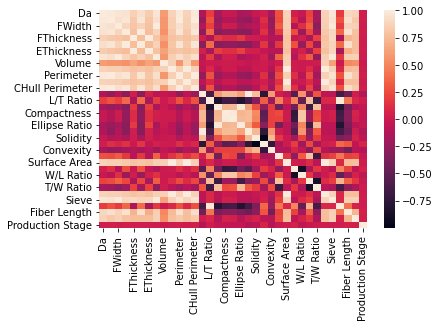

In [52]:
import seaborn as sns

for x in data.columns: 
    data[x] = pd.to_numeric(data[x])

sns.heatmap(data.corr())

In [53]:
s =data.corr()
the_corr = s['Production Stage']

In [54]:
the_corr

Da                    0.025562
Dp                    0.039007
FWidth                0.013860
FLength               0.034796
FThickness            0.019973
ELength               0.030728
EThickness            0.016485
EWidth                0.010461
Volume               -0.001783
Area                  0.010128
Perimeter             0.039007
CHull  Area           0.010623
CHull Perimeter       0.034216
Sphericity           -0.120339
L/T Ratio             0.020885
T/L Aspect Ratio     -0.030054
Compactness          -0.046134
Roundness            -0.049205
Ellipse Ratio        -0.028785
Circularity          -0.121177
Solidity             -0.069948
Concavity             0.069948
Convexity            -0.110819
Extent               -0.015434
Surface Area          0.010128
L/W Ratio             0.053797
W/L Ratio            -0.056822
W/T Ratio            -0.013822
T/W Ratio             0.007395
CHull Surface Area    0.010623
Sieve                 0.016452
Ellipticity           0.021060
Fiber Le

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data[filtered],
    data['Production Stage'],
    test_size=0.2,
    stratify= data['Production Stage'],
    random_state=44)

y_train.groupby(y_train).count()
y_test.groupby(y_test).count()



Production Stage
0    9714
1    9938
2    2964
3    7336
4    7336
Name: Production Stage, dtype: int64

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.model_selection import GridSearchCV

In [57]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))


In [86]:
model = KNeighborsClassifier(n_neighbors=5, weights= 'uniform', algorithm= 'auto', leaf_size= 5, p=1)

scaled_data = scale(data[filtered])

model.fit(data[filtered], data["Production Stage"])
labels = data['Production Stage']

random = data.sample(frac = 1)

one_hundred = random[:10000]

predictions = model.predict(ss[filtered])


In [87]:
predictions

x_coords = [0,0,0,0,0]

for i in predictions:
    if i == 0:
        x_coords[0] = x_coords[0] + 1
    if i == 1:
        x_coords[1] = x_coords[0] + 1
    if i == 2:
        x_coords[2] = x_coords[0] + 1
    if i == 3:
        x_coords[3] = x_coords[0] + 1
    if i == 4:
        x_coords[4] = x_coords[0] + 1

x_coords

stages = ['Stage 0', 'Stage 1', 'Stage 2', 'Stage 3', 'Stage 4']

x_coords


[22802, 22803, 22692, 22803, 22801]

<BarContainer object of 5 artists>

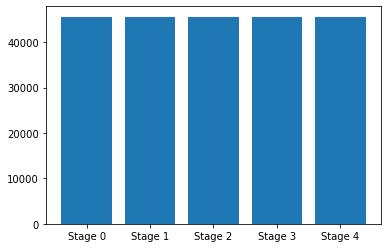

In [84]:
plt.bar(stages,x_coords)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

print('Accuracy score:',accuracy_score(one_hundred['Production Stage'], predictions))

print(precision_score(one_hundred['Production Stage'], predictions, average='macro'))





Accuracy score: 0.4713
0.43990326372182686


In [ ]:
Removed_features = ['T/W Ratio', 'Volume', 'Surface Area' ]
new_setting =[x for x in filtered if x not in Removed_features]
new_setting.append('Production Stage')
new_data = data[new_setting]
new_setting.pop()
new_setting


['Da',
 'Dp',
 'FWidth',
 'FLength',
 'FThickness',
 'ELength',
 'EThickness',
 'EWidth',
 'Area',
 'Perimeter',
 'CHull  Area',
 'CHull Perimeter',
 'Sphericity',
 'L/T Ratio',
 'T/L Aspect Ratio',
 'Compactness',
 'Roundness',
 'Ellipse Ratio',
 'Circularity',
 'Solidity',
 'Concavity',
 'Convexity',
 'Extent',
 'L/W Ratio',
 'W/L Ratio',
 'W/T Ratio',
 'CHull Surface Area',
 'Sieve',
 'Ellipticity',
 'Fiber Length',
 'Fiber Width']

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

my_dict = {'leaf_size': range(30,40),
            'Algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}



seven = KNeighborsClassifier(n_neighbors=5, weights= 'distance', algorithm= 'brute', leaf_size= 35, p=2)
search = GridSearchCV(model, my_dict)
search.fit(new_data[new_setting], new_data["Production Stage"])
labels = new_data['Production Stage']

random = new_data.sample(frac = 1)

one_hundred = random[:5000]

predictions = search.predict(one_hundred[new_setting])

ValueError: Invalid parameter Algorithm for estimator KNeighborsClassifier(leaf_size=5, p=1). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
print('Accuracy score:',accuracy_score(one_hundred['Production Stage'], predictions))

print(precision_score(one_hundred['Production Stage'], predictions, average='macro'))

Accuracy score: 0.7976
0.8204975124378109
